In [46]:
import Segmantation_lib as sg
import pandas as pd
import sys

In [51]:
path_to_root="/people/berhe/Bureau/TLP_thesis/SegmentationPaperResources"
sys.path.insert(0,path_to_root)

In [48]:
shot='/people/berhe/Bureau/video/Shot_output01.json'
shotStart,shotEnd=sg.getShots(shot)

In [3]:
shotsBB='/people/berhe/Bureau/video/BreakingBad.Season01.Episode01_threshold_1.0.json'
shotStartBB,shotEndBB=sg.getShots(shotsBB)

In [5]:
data = pd.read_csv('/people/berhe/Bureau/TLP_thesis/SegmentationPaperResources/AnnotatedScene/Got/season1/Shots/shots_S01E01', delimiter="\t")
dataBB = pd.read_csv('/people/berhe/Bureau/TLP_thesis/SegmentationPaperResources/AnnotatedScene/BreakingBad/season1/Shots/shots_S01E01', delimiter="\t")

In [6]:
data.columns

Index(['shot', 'start', 'end'], dtype='object')

In [7]:
len(shotStart)

1123

In [8]:
len(data)

982

In [9]:
from pyannote.core import Annotation, Segment

In [10]:
hyp=shotEnd[0:100]
ref=data['end'][0:100]
ref=[i/1000 for i in ref]
hyp1=shotStart[100:300]
ref1=data['start'][100:300]
ref1=[i/1000 for i in ref1]

hypBB=shotEndBB[0:100]
refBB=dataBB['end'][0:100]
refBB=[i/1000 for i in refBB]
hyp1BB=shotStartBB[100:300]
ref1BB=data['start'][100:300]
ref1BB=[i/1000 for i in ref1BB]

In [11]:
hyp1[10],ref1[10],hyp1BB[10],ref1BB[10]

(391.44, 395.2, 289.96, 395.2)

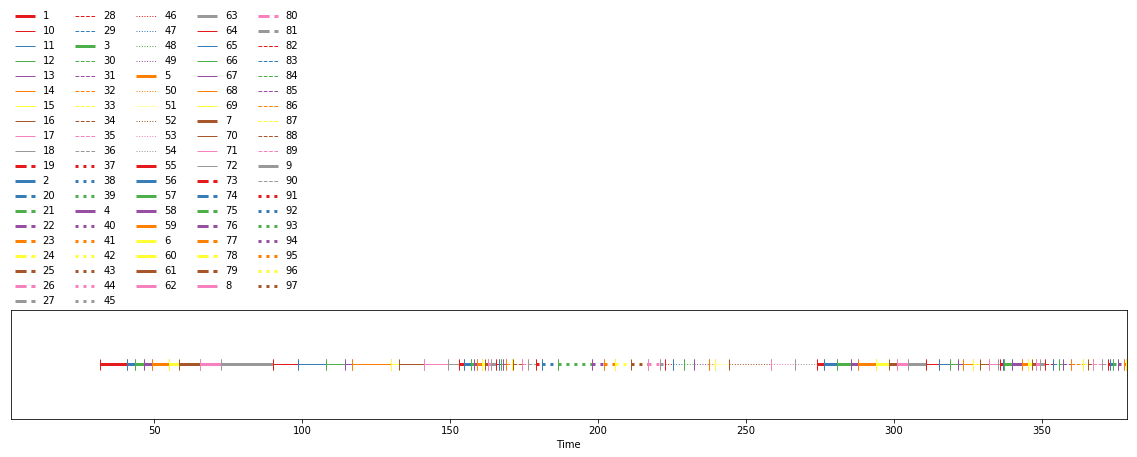

In [14]:
shotPyannote = Annotation()
for i in range(1,len(hyp)):
    shotPyannote[Segment(hyp[i-1], hyp[i])] = str(i)
shotPyannote
shotMakarand

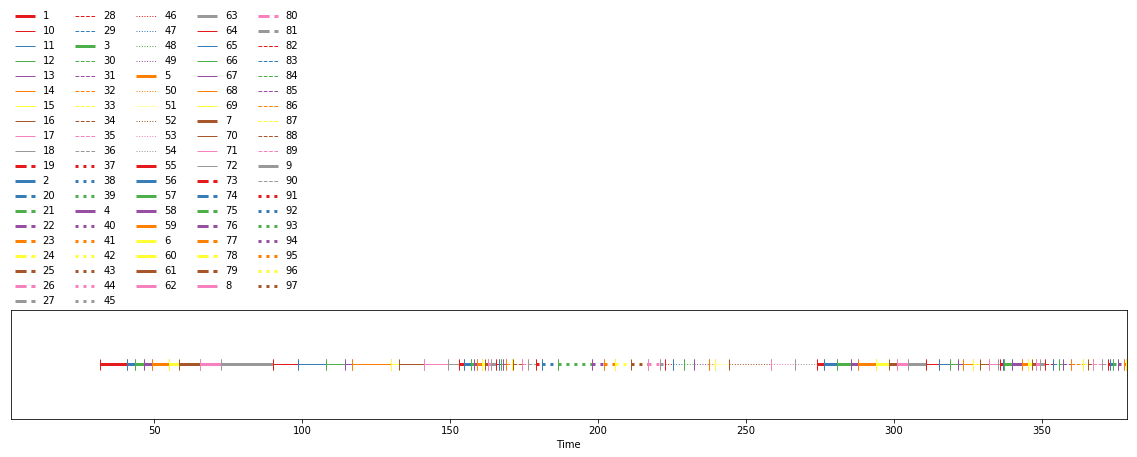

In [13]:
shotMakarand = Annotation()
for i in range(1,len(ref)):
    shotMakarand[Segment(ref[i-1], ref[i])] = str(i)
shotMakarand

In [12]:
data['end'][0]/1000,shotEnd[0]

(31.68, 1.44)

In [30]:
import matplotlib.pylab as plt
def drawBoundry(refernceList,hypothesisList,pos1,pos2):
    ref=refernceList[pos1:pos2]
    hyp=hypothesisList[pos1:pos2]
    for segment in ref:
        plt.plot([segment, segment], [-5, -0.2], 'r')
    for segment in hyp:
        plt.plot([segment, segment], [0.2, 5], 'g')
    plt.ylim(-2, 2);
    plt.xlim(ref[pos1],hypothesisList[-1]);
    plt.xlabel('Time (seconds)');

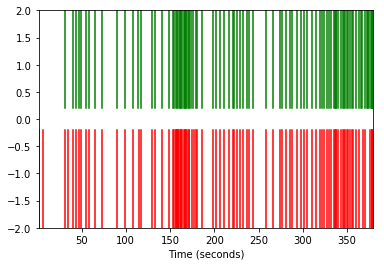

In [31]:
drawBoundry(hyp,ref,0,len(ref))

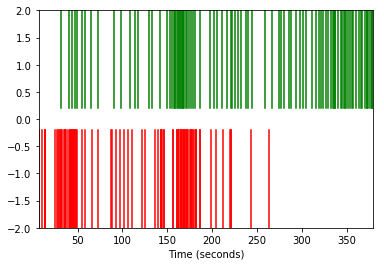

In [32]:
drawBoundry(hypBB,ref,0,len(refBB))

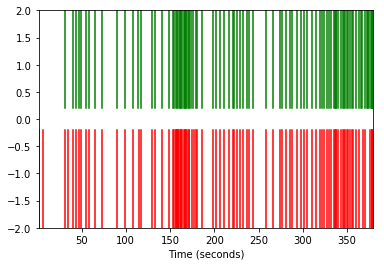

In [33]:
drawBoundry(hyp,ref,0,len(ref))

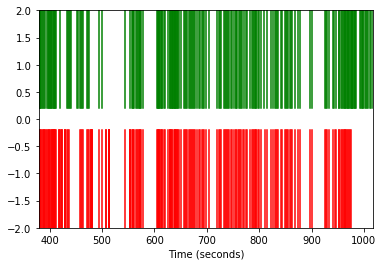

In [34]:
drawBoundry(hyp1,ref1,0,len(ref1))

In [35]:
ref[1],ref1[1]

(40.64, 380.44)

In [36]:
scenes_dir='/people/berhe/Bureau/clean/TLP_thesis/Scenes/'

In [82]:
data = pd.read_csv(path_to_root+'/AnnotatedScene/Got/season1/Shots/shots_S01E01', delimiter="\t")

In [83]:
data.columns

Index(['shot', 'start', 'end'], dtype='object')

In [84]:
len(data)

982

In [85]:
segthreshold = pd.read_csv('/people/berhe/Bureau/video/shotSeg_1.2', delimiter="\t")

In [86]:
segthreshold.columns

Index(['shot', 'start', 'end'], dtype='object')

In [87]:
makarShot=data['end']
makarShot=[i/1000 for i in makarShot]
refThreshold=segthreshold['end']
refThreshold=[i for i in refThreshold]

In [88]:
makarShot[-1]

3545.84

In [89]:
refThreshold[-1]

3545.82

In [ ]:
drawBoundry(makarShot,refThreshold,0,len(makarShot))

In [75]:
makarShot[-1],refThreshold[-1]

(3545.84, 3545.82)

In [78]:
makarShot[20],refThreshold[30]

(1278.8, 153.08)

In [79]:
len(refThreshold)

933

In [80]:
len(makarShot)

44